In [1]:
import sympy
sympy.init_printing()
sympy.var("x, y, z", real=True)
sympy.var("n_x, n_y, n_z, d", positive=True)

# Volume of cube and half-space intersection

Calculating volume of intersection of cube $[-1, 1]^3$ and half-space $x n_x + y n_y + z n_z < d$

## Symmetry removal
This algorithm works by first normalizing all symmetries of the problem.
This means that we can only look at the $z = 1$ surface of the cube and limits the possible shapes of the intersections.

Since we are only interested interested in volume, rotations and flips don't change the result and we don't need to keep track of what normalization steps we do.
The only exception is negating distance, which corresponds to switching the meaning of inside/outside of the half-space and the result must be compensated for this.

The conditions for normalized state are: $n_z \geq n_y \geq n_x \geq 0$ and $d \geq 0$, giving us the following cases:

![Cases after symmetry removal](cube_halfspace_cases.svg)
Red parts have ceiling of $+1$, white parts have ceiling $x n_x + y n_y + z n_z = d$. In case 1b the brown part does not contribute any volume. Black dots are locations used for determining cases, grey lines split the cases into individual integrals.

## Calculating the volumes

In [2]:
plane_eq = sympy.Eq(x * n_x + y * n_y + z * n_z, d)
plane_eq

In [3]:
ceiling = next(iter(sympy.solveset(plane_eq, z))).expand()
ceiling

In [4]:
def lerp(x, x1, x2, y1, y2):
    return (y1 + (y2 - y1) * (x - x1) / (x2 - x1)).simplify()

def area_integral(z_max_expr, x1, y1min, y1max, x2, y2min, y2max):
    return sympy.integrate(1, (z, -1, z_max_expr), (y, lerp(x, x1, x2, y1min, y2min), lerp(x, x1, x2, y1max, y2max)), (x, x1, x2))

def edge_intersection(variable, axis1, value1, axis2=z, value2=1):
    solved = sympy.solveset(plane_eq.subs(axis1, value1).subs(axis2, value2), variable)
    expr = next(iter(solved)).expand()
    return expr

def s(expr):
    simplified = sympy.collect_const(expr.expand().factor().collect([d]))
    return simplified

def unexpand(expr, a):
    return expr.subs(a.expand(), a)

def check(a, b):
    assert a.expand() == b.expand()
    return b

### Case 0:

In [5]:
v0 = s(area_integral(ceiling, -1, -1, 1, 1, -1, 1))
v0

In case 0 the plane does not intersect cubes $Z = \pm1$ sides.

### Case 1a:

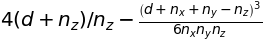

In [6]:
x_1 = edge_intersection(x, y, -1)
y_1 = edge_intersection(y, x, -1)
v1a = s(area_integral(1, -1, -1, y_1, x_1, -1, -1) +
        area_integral(ceiling, -1, y_1, 1, x_1, -1, 1) +
        area_integral(ceiling, x_1, -1, 1, 1, -1, 1))
v1a = unexpand(v1a, 3 * (n_x + n_y - n_z)**2 - 24 * n_x * n_y)
v1a = unexpand(v1a, (n_x + n_y - n_z)**3 - 24 * n_x * n_y * n_z)
v1a = unexpand(v1a, 3 * (n_x + n_y - n_z))
v1a = check(v1a, v0 - (d + n_x + n_y - n_z)**3 / (6 * n_x * n_y * n_z))
v1a

Like case 0, but with trirectangular tetrahedron subtracted at corner $(-1, -1, 1)$.

### Case 1b

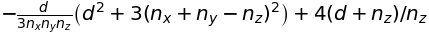

In [7]:
x_1 = edge_intersection(x, y, -1)
y_1 = edge_intersection(y, x, -1)
x_2 = edge_intersection(x, y, 1, z, -1)
y_2 = edge_intersection(y, x, 1, z, -1)
v1b = s(area_integral(1, -1, -1, y_1, x_1, -1, -1) +
        area_integral(ceiling, -1, y_1, 1, x_1, -1, 1) +
        area_integral(ceiling, x_1, -1, 1, x_2, -1, 1) +
        area_integral(ceiling, x_2, -1, 1, 1, -1, y_2))
v1b = unexpand(v1b, 3 * (n_x + n_y - n_z)**2 - 12 * n_x * n_y)
v1b = check(v1b, v0 - d * (d**2 + 3 * (n_x + n_y - n_z)**2) / (3 * n_x * n_y * n_z))
v1b

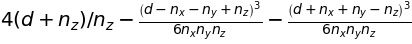

In [8]:
check(v1b, v1a - ((d + n_x + n_y -n_z)**3 - 6 * d**2 * (n_x + n_y - n_z) - 2 * (n_x + n_y - n_z)**3).expand().factor() / (6 * n_x * n_y * n_z))


Like case 1a, but with additional trirectangular tetrahedron subtracted at corner $(1, 1, -1)$.

### Case 2

In [9]:
y_1 = edge_intersection(y, x, -1)
y_2 = edge_intersection(y, x, 1)
v2 = s(area_integral(1, -1, -1, y_1, 1, -1, y_2) +
       area_integral(ceiling, -1, y_1, 1, 1, y_2, 1))
v2 = unexpand(v2, 3 * (n_y + n_z)**2 - 24 * n_y * n_z + n_x**2)
#v2 = unexpand(v2.expand().factor(), 3 * (d - n_y - n_z)**2)
v2 = check(v2, 8 - (n_x**2/3 + (n_y + n_z - d)**2) / (n_y * n_z))
v2

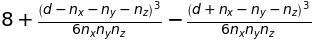

In [10]:
check(v2, 8 - ((d + n_x - n_y - n_z)**3 / (6 * n_x * n_y * n_z) - (d - n_x - n_y - n_z)**3 / (6 * n_x * n_y * n_z)))

Whole cube with a weird prism-thingie subtracted along the $Y=1, Z=1$ edge.

### Case 3

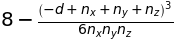

In [11]:
x_1 = edge_intersection(x, y, 1)
y_1 = edge_intersection(y, x, 1)
v3 = s(area_integral(1, -1, -1, 1, x_1, -1, 1) +
  area_integral(1, x_1, -1, 1, 1, -1, y_1) +
  area_integral(ceiling, x_1, 1, 1, 1, y_1, 1))
#z_1 = edge_intersection(z, x, 1, y, 1)
#v3 = check(v3, 8 - (1 - x_1) * (1 - y_1) * (1 - z_1) / 6)
v3 = unexpand(v3, 3 * (n_x + n_y + n_z)**2)
v3 = unexpand(v3, -(n_x + n_y + n_z)**3 + 48* n_x * n_y * n_z)
v3 = check(v3, 8 - (n_x + n_y + n_z - d)**3 / (6 * n_x * n_y * n_z))
v3

Whole cube with trirectangular tetrahedron subtracted at corner $(1, 1, 1)$.

### Case 4

In [12]:
s(area_integral(1, -1, -1, 1, 1, -1, 1))

The whole cube is inside the half space. No problems here.